In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
 pip install plotly 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lourd\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import plotly.express as px
import plotly.graph_objects as go
#import colorlover as cl
from plotly.subplots import make_subplots

In [8]:
pwd

'C:\\Users\\lourd'

In [10]:
path ='D:\Virtual Internship\COVID 19'

In [11]:
os.chdir(path)

In [12]:
pwd

'D:\\Virtual Internship\\COVID 19'

In [13]:
df=pd.read_excel('covid_vaccinations_19_10_2021.xlsx', sheet_name="TLA")

In [14]:
df.head()

,Territorial Authority,Population,First Dose,Second Dose,% First Dose,% Second Dose,Unnamed: 6,Unnamed: 7,Notes:
0,Ashburton District,27424,23566,15946,0.859320,0.581461,NaN,NaN,Population is based on the population reported...
1,Auckland,1383804,1227116,1003929,0.886770,0.725485,NaN,NaN,Population excludes any individuals since dece...
2,Buller District,8272,6276,4928,0.758704,0.595745,NaN,NaN,Vaccinations data will include individuals tha...
3,Carterton District,8259,6961,5623,0.842838,0.680833,NaN,NaN,TLA2018 boundaries do not map cleanly to the D...
4,Central Hawke's Bay District,11838,9819,7715,0.829448,0.651715,NaN,NaN,Vaccinations are based on the TLA of residence...


Analysis based on District

In [15]:
df1= pd.DataFrame(df, columns=['Territorial Authority', 'Population','First Dose','Second Dose','% First Dose', '% Second Dose'])
df1

,Territorial Authority,Population,First Dose,Second Dose,% First Dose,% Second Dose
0,Ashburton District,27424,23566,15946,0.859320,0.581461
1,Auckland,1383804,1227116,1003929,0.886770,0.725485
2,Buller District,8272,6276,4928,0.758704,0.595745
3,Carterton District,8259,6961,5623,0.842838,0.680833
4,Central Hawke's Bay District,11838,9819,7715,0.829448,0.651715
...,...,...,...,...,...,...
64,Westland District,7100,5695,4443,0.802113,0.625775
65,Whakatane District,30432,21557,16215,0.708366,0.532827
66,Whanganui District,39902,30698,25359,0.769335,0.635532
67,Whangarei District,78696,62755,50715,0.797436,0.644442


In [16]:
df1.head()

,Territorial Authority,Population,First Dose,Second Dose,% First Dose,% Second Dose
0,Ashburton District,27424,23566,15946,0.859320,0.581461
1,Auckland,1383804,1227116,1003929,0.886770,0.725485
2,Buller District,8272,6276,4928,0.758704,0.595745
3,Carterton District,8259,6961,5623,0.842838,0.680833
4,Central Hawke's Bay District,11838,9819,7715,0.829448,0.651715


Normalisation of the column

In [17]:
df1['% First Dose'] = df['% First Dose'].apply(lambda x : int(x) if x > 1 else int(100*x))


In [18]:
df1['% Second Dose'] = df['% Second Dose'].apply(lambda x : int(x) if x > 1 else int(100*x))

In [19]:
df1.head()

,Territorial Authority,Population,First Dose,Second Dose,% First Dose,% Second Dose
0,Ashburton District,27424,23566,15946,85,58
1,Auckland,1383804,1227116,1003929,88,72
2,Buller District,8272,6276,4928,75,59
3,Carterton District,8259,6961,5623,84,68
4,Central Hawke's Bay District,11838,9819,7715,82,65


Highest District with Second Dose

In [20]:
high_df= df1.groupby( 'Territorial Authority')['% Second Dose'].sum().reset_index()
high_df.head()
high_sorted= high_df.sort_values(by='% Second Dose', ascending = False)
high_sorted

,Territorial Authority,% Second Dose
6,Chatham Islands Territory,88
9,Dunedin City,77
38,Queenstown-Lakes District,75
28,Marlborough District,74
5,Central Otago District,73
...,...,...
34,Opotiki District,53
44,South Waikato District,52
26,Mackenzie District,52
41,Ruapehu District,51


Text(0.5, 1.0, 'Top District with highest Vaccination')

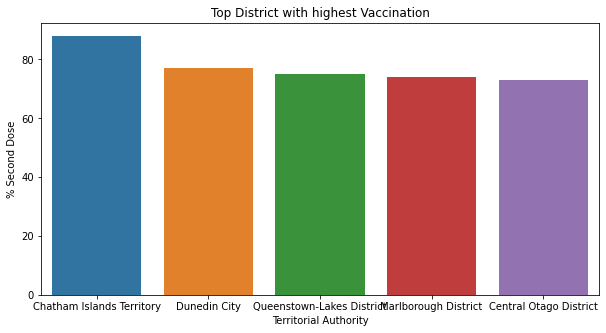

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(y='% Second Dose', x='Territorial Authority', data= high_sorted.head() )
plt.title('Top District with highest Vaccination')

Highest District with First dose

In [22]:
high_df= df1.groupby( 'Territorial Authority')['% First Dose'].sum().reset_index()
high_df.head()
high_sorted= high_df.sort_values(by='% First Dose', ascending = False)
high_sorted

,Territorial Authority,% First Dose
38,Queenstown-Lakes District,95
63,Wellington City,93
42,Selwyn District,93
9,Dunedin City,90
1,Auckland,88
...,...,...
41,Ruapehu District,71
66,Whakatane District,70
34,Opotiki District,69
24,Kawerau District,65


Text(0.5, 1.0, 'Top District with highest Vaccination')

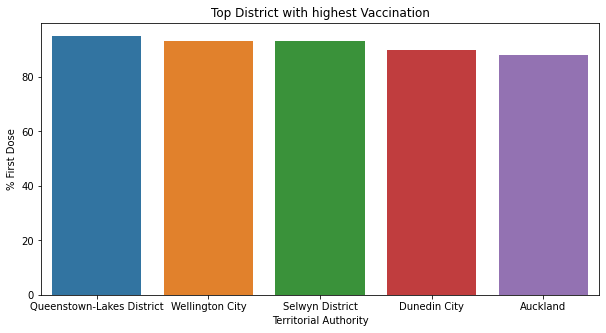

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(y='% First Dose', x='Territorial Authority', data= high_sorted.head() )
plt.title('Top District with highest Vaccination')

Analysis based on doses administered


In [24]:
df_dose=pd.read_excel('covid_vaccinations_19_10_2021.xlsx', sheet_name="Date")

In [25]:
df_dose.head()

,Date,First dose administered,Second dose administered
0,2021-02-18,1,0
1,2021-02-19,29,0
2,2021-02-20,65,0
3,2021-02-21,68,1
4,2021-02-22,448,0


In [26]:
df_dose.info()
df_dose.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      244 non-null    datetime64[ns]
 1   First dose administered   244 non-null    int64         
 2   Second dose administered  244 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.8 KB


,First dose administered,Second dose administered
count,244.000000,244.000000
mean,14727.409836,11629.942623
std,15285.191059,14130.090779
min,1.000000,0.000000
25%,3752.250000,1665.500000
50%,9591.500000,7420.000000
75%,19291.500000,15609.500000
max,67933.000000,91356.000000


Convert time data

In [ ]:
df_dose['Date'] = pd.to_datetime(df_dose['Date'],format="%Y-%m-%d",errors = 'coerce')
df_dose.head()

Text(0.5, 1.0, 'Daily Vaccinations')

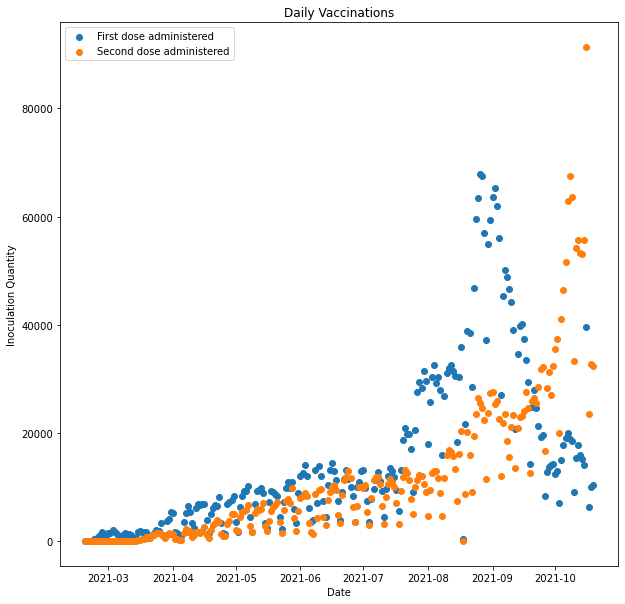

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df_dose['Date'],df_dose['First dose administered'],label='First dose administered')
plt.scatter(df_dose['Date'],df_dose['Second dose administered'],label='Second dose administered')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inoculation Quantity')
plt.title('Daily Vaccinations') 

In [29]:
b=[]
c=[]
total_1 = 0
total_2 = 0
for i in df_dose['First dose administered']:
    total_1+= i
    b.append(total_1)
df_dose['Total First dose administered'] = b
for i in df_dose['Second dose administered']:
    total_2+= i
    c.append(total_2)
df_dose['Total First dose administered'] = b
df_dose['Total Second dose administered'] = c
df_dose['Just First dose administered'] = df_dose['Total First dose administered'] - df_dose['Total Second dose administered']
df_dose.tail()

,Date,First dose administered,Second dose administered,Total First dose administered,Total Second dose administered,Just First dose administered
239,2021-10-15,14087,55693,3527227,2657715,869512
240,2021-10-16,39543,91356,3566770,2749071,817699
241,2021-10-17,6288,23428,3573058,2772499,800559
242,2021-10-18,10038,32790,3583096,2805289,777807
243,2021-10-19,10392,32417,3593488,2837706,755782


Text(0.5, 1.0, 'Total Vaccinations')

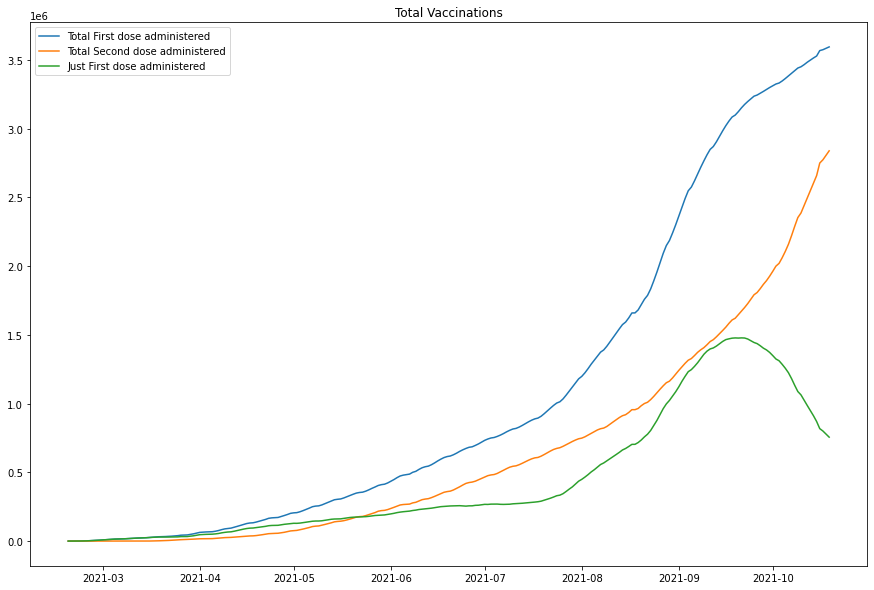

In [35]:
plt.figure(figsize=(15,10))
plt.plot(df_dose['Date'],df_dose['Total First dose administered'], label='Total First dose administered')
plt.plot(df_dose['Date'],df_dose['Total Second dose administered'], label='Total Second dose administered')
plt.plot(df_dose['Date'],df_dose['Just First dose administered'], label='Just First dose administered')
plt.legend()
plt.title('Total Vaccinations') 
